Estimate the followign equation by Non-linear Least Squares

$$
    r_{t+1} = log(\varepsilon_{t+1}) + log(1 - \kappa e^{x_{t} \beta}) - log(1 - \kappa e^{x_{t+1} \beta}).
$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#first we generate fictitiuos first stage estimates
x = np.random.normal(0,0.1,1000)
beta = np.random.normal(0,0.1,1000)
kappa = 0.8
x_beta_t = np.exp(x[:-1] * beta[:-1])
x_beta_t1 = np.exp(x[1:] * beta[1:])

#check that 1 - kappa * exp(x_beta) is positive
assert np.all(1 - kappa * x_beta_t > 0)
assert np.all(1 - kappa * x_beta_t1 > 0)

#generate residuals
log_epsilon = np.random.normal(0,0.1,len(x)-1)

#generate r_t+1
r_t1 = log_epsilon + np.log(1 - kappa * x_beta_t) - np.log(1 - kappa * x_beta_t1)

In [ ]:
#nls estimation
from scipy.optimize import curve_fit

def model(data, kappa):
    x_beta_t, x_beta_t1 = data
    return np.log(1 - kappa * x_beta_t) - np.log(1 - kappa * x_beta_t1)
popt, pcov = curve_fit(model, (x_beta_t, x_beta_t1), r_t1, bounds=(0,1))
#t statistic
perr = np.sqrt(np.diag(pcov))
t_stat = popt / perr

# r_squared
residuals = r_t1 - model((x_beta_t, x_beta_t1), *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((r_t1 - np.mean(r_t1))**2)
r_squared = 1 - (ss_res / ss_tot)

#show estimated kappa
print(f"Estimated kappa: {popt[0]:.4f}")
print(f"T-statistic: {t_stat[0]:.4f}")
print(f"R-squared: {r_squared:.4f}")

Estimated kappa: 0.8077
T-statistic: 102.5912
R-squared: 0.2782


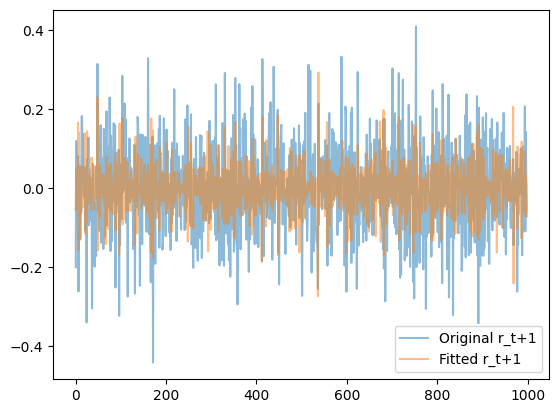

In [19]:
#visualize original vs fitted
fitted_values = model((x_beta_t, x_beta_t1), *popt)
plt.plot(r_t1, label='Original r_t+1', alpha=0.5)
plt.plot(fitted_values, label='Fitted r_t+1', alpha=0.5)
plt.legend()
plt.show()